First we set up our libraries and import the wrangled, cleaned dataset we created:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

os.getcwd()

'C:\\Users\\David Olivero\\AnacondaProjects\\Loans-In-Colorado'

In [2]:
df = pd.read_csv('data\\SBA_Model_Input.csv')

df.head().T

,0,1,2,3,4
Name,MICHAEL GADEKEN DDS PC,"MINE TECHNOLOGIES,INC.","CRAIG M. DROSKIN, D.D.S.",Johnny R. Webb II DBA Webb's A,THE DONUT SHOP PLUS
City,Grand Junction,Grand Junction,Grand Junction,Grand Junction,Grand Junction
Bank,WELLS FARGO BANK NATL ASSOC,ANB BANK,WELLS FARGO BANK NATL ASSOC,CAPITAL ONE NATL ASSOC,ANB BANK
BankState,SD,CO,SD,VA,CO
NAICS,621210,333131,621210,811111,0
ApprovalDate,7-Feb-06,7-Mar-97,14-Mar-97,25-Oct-04,16-Apr-97
ApprovalFY,2006,1997,1997,2005,1997
Term,264,60,120,35,60
NoEmp,9,2,4,3,2
NewExist,1,1,1,1,1


#### Dates (Approval and Disbursement) ####
While it's doubtful that the calendar dates of loan approval and loan disbursement will factor into whether or not a loan gets paid off, it would be interesting to factor in how LONG a business had to wait for their loan. IS it possible that the longer one has to wait, the lower the chance of payback? Or perhaps the better the chance?

In [3]:
#  Reset the Approval and Disbursement Date columns in recognizable datetime format.

df.ApprovalDate = pd.to_datetime(df.ApprovalDate)
df.DisbursementDate = pd.to_datetime(df.DisbursementDate)

In [4]:
# Create a new column that hols the difference betwee the two columns, in days:

df['PayDelay'] = df.DisbursementDate - df.ApprovalDate

In [5]:
# Reduce this data form to a simple integer value for # of days. 

df['PayDelay'] = pd.to_numeric([df['PayDelay'][i].days for i in df.index])

In [6]:
# A typical loan takes 107 days to be fulfilled, but we shoudl explore the extreme values in this distribution. 

df.PayDelay.describe()

count    19332.000000
mean       107.376474
std        156.698538
min        -10.000000
25%         30.000000
50%         56.000000
75%        115.000000
max       2403.000000
Name: PayDelay, dtype: float64

In [7]:
# Let's investigate the very high values :

df[df.PayDelay > 1500].head().T

,921,989,3415,4016,4137
Name,SUPREME CABLE TECHNOLOGY,"King Kong Building Services, I",AWG FOOD CATERING,"SHOP N SAVE, INC.",COLORADO AIDS PHARMACY
City,Thornton,Denver,Denver,Denver,Denver
Bank,"BANK MIDWEST, A DIVISION OF",WELLS FARGO BANK NATL ASSOC,JPMORGAN CHASE BANK NATL ASSOC,KEYBANK NATIONAL ASSOCIATION,BANK OF THE WEST
BankState,MO,SD,IL,CO,CO
NAICS,314991,0,722211,0,446110
ApprovalDate,1996-07-26 00:00:00,1997-06-13 00:00:00,2002-12-05 00:00:00,1994-12-01 00:00:00,1995-05-03 00:00:00
ApprovalFY,1996,1997,2003,1995,1995
Term,60,84,84,180,60
NoEmp,100,9,4,19,3
NewExist,1,1,1,1,1


In [8]:
# And let's also investigate the negative values :

df[df.PayDelay < 0].head().T

,2614,2633,4451,5845,7662
Name,"PREMIER SECURITY, INC","Huff & Leslie, LLP","FANDANGO,INC.",Trang Thi Ai Tran,"BRAZOS BUILDERS, INC"
City,Denver,Denver,Denver,Aurora,Colorado Springs
Bank,"SUPERIOR FINANCIAL GROUP, LLC",JPMORGAN CHASE BANK NATL ASSOC,FIRSTBANK,WILSHIRE BANK,5 STAR BANK
BankState,CA,IL,CO,CA,CO
NAICS,561612,541110,0,445310,236210
ApprovalDate,2010-06-03 00:00:00,2010-07-13 00:00:00,1996-05-09 00:00:00,2010-03-11 00:00:00,2010-03-11 00:00:00
ApprovalFY,2010,2010,1996,2010,2010
Term,107,84,60,120,60
NoEmp,2,2,3,3,2
NewExist,1,1,2,1,1


In [9]:
# Still, to avoid any strange modeling issues, we will change any values less than 1 day to be 1 day. 
# And any delay values greater than 1000 days to be 1000 days (somewhat arbitrary, admittedly)

df.loc[df['PayDelay'] < 1, ['PayDelay']] = 1

#df.loc[df['PayDelay'] > 1000, ['PayDelay']] = 1000

In [10]:
# Instead of otruncating data at 1000 days, here we opt to log transform this feature:

df.PayDelay = np.log(df.PayDelay)

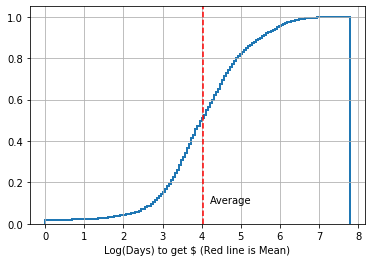

In [11]:
# The resulting distribution. We're now ready to delete the date columns.  

_ = df.PayDelay.hist(bins=150,density=True, histtype='step', cumulative=True, linewidth=2)
_ = plt.xlabel('Log(Days) to get $ (Red line is Mean)')
_ = plt.axvline(np.mean(df.PayDelay), color='red', linestyle='--')
_ = plt.annotate('Average', xy=(4.2, 0.1))
plt.show()

#### Wholesale deletion of a bunch of columns we don't need: ####
First off, we'll get rid of some columns we won't need in our regression efforts.   
1 - Name: Name of Individual  
2 - City: City of Business (we are already importing a lot of couty-specific information to the model)  
3 - Bank: We will assume that the bank the loan is with is not a significant factor.  
4 - BankState: The state of the branch of bank used. Again, assumed to be not significant.  
5 - UrbanRural: Too many undefined make this not a useful category.
6 - ChgOffDate: Assume that loan payment performance os not a function of when in the calendar year the loan was charged off.  
7 - BalanceGross: A redundant feature to the loan amount.  
8 - County_Fips: This is just a key column for adding other data.  
9 - County_Name: County name shouldn't matter either (**But I'll keep it in, in case I want to one-hot encode it.**)  
10- GrAppv: Gross amount of loan approved by bank - highly correlated to gross disbursement.  
11- SBA_Appv: SBA's guaranteed amount of approved loan - again, highly correlated to gross disbursement.  
12- ChgOffPrinGr: Amount charged off, which will be mostly empty data since most loans get paid off.  
13- ApprovalDate: We will assume that when in the year the loan was approved is not a significant explanatory variable for loan payoff.  
14- DisbursementDate: Similar to approval date, but the calendar date of actual money disbursement.


In [12]:
df = df.drop(columns=['Name', 'City', 'Bank', 'BankState', 'ChgOffDate', 'UrbanRural', 'BalanceGross', \
                      'County_Fips', 'GrAppv','SBA_Appv', 'ChgOffPrinGr', 'ApprovalDate','DisbursementDate'])

df.head().T

,0,1,2,3,4
NAICS,621210,333131,621210,811111,0
ApprovalFY,2006,1997,1997,2005,1997
Term,264,60,120,35,60
NoEmp,9,2,4,3,2
NewExist,1,1,1,1,1
CreateJob,0,0,0,0,0
RetainedJob,9,0,0,0,0
FranchiseCode,1,1,1,1,1
RevLineCr,0,N,0,N,N
LowDoc,N,Y,N,N,Y


In [13]:
# Here we'll define a function that'll take a look at the test statistic for two proportions,
# To test against a hypothesis that they came from the same binomial distribution.


def props(a_yes, a_no, b_yes, b_no):
    n1 = a_yes + a_no                     # <------Population of first proportion (e.g., standard loans)
    n2 = b_yes + b_no                     # <------Population of 2nd proportion (e.g., low-doc loans)
    p1 = a_yes/n1                         # <------1st proportion
    p2 = b_yes/ n2                         # <------2nd proportion
    p_hat = (n1*p1 + n2*p2)/(n1 + n2)     # <------Combined proportion

    z_stat = (p2 - p1)/np.sqrt(p_hat*(1-p_hat)* (1/n1 + 1/n2))

    return print('No. samples:', n1, 'and', n2, '\nPositive Rate:', p1, 'and', p2, '\nAvg. positive rate:', p_hat, '\nZ-statistic:', z_stat)



## NewExist (and converting it to NewBiz) ##
Next we explore some categorical and discrete variables, and how they relate to loan performance. 'NewExist' is a variable that codes whether the business is new (2) or existing (1):

In [14]:
df.groupby(['NewExist','MIS_Status']).count()['NAICS']

NewExist  MIS_Status
0.0       P I F            17
1.0       CHGOFF         2559
          P I F         12329
2.0       CHGOFF          814
          P I F          3646
Name: NAICS, dtype: int64

For existing businesses, loans get repayed about 82.8% of the time. For new businesses, than number is about 81.7%. So if there is a signal here, it's a pretty weak one. Still, we'll redefine this column as "NewBiz", whether the business is new(1) or not(0). Here well also need to get rid of the 17 rows that don't fit. 

In [15]:
# Redefine and rename the NewExist column: new business (1) or not (0): 

df = df[df['NewExist'] >= 1.0]     # <------ Get rid of 17 rows with ambiguous definition

df['NewExist'] = df['NewExist'] - 1        

df = df.rename(columns={'NewExist': 'NewBiz'}) 

In [16]:
# Resulting categorical variable is much cleaner:

df.groupby(['NewBiz','MIS_Status']).count()['NAICS']

NewBiz  MIS_Status
0.0     CHGOFF         2559
        P I F         12329
1.0     CHGOFF          814
        P I F          3646
Name: NAICS, dtype: int64

In [17]:
# Let's take a look at the test statistic for these two binomial distributions.

props(12329, 2559, 3646, 814)

# Since z-statistic is less than 2, it's possible that the two proportions came from the same binomial distribution. 

No. samples: 14888 and 4460 
Positive Rate: 0.8281166039763568 and 0.8174887892376682 
Avg. positive rate: 0.8256667355799049 
Z-statistic: -1.641039444706116


Our z-statistic indicates that the means of the two populations are only 1.64 standard deviations apart, bringing some doubt as to the ultimate significance of whether a businessis new or not. Mean difference is approximately 1.1%, hence we don't imagine this feature will be a top ten important feature in the upcoming modeling. Still, we'll probably keep it around. 

## RevLineCr ##
Moving on, we look at 'RevLineCr', which refers to whether or not the loan involved a revolving line of credit. In this case(below), with a revolving line of cerdit, loans get repayed about 67.4% of the time. With no revolving line of credit, loans get repayed about 89.0% of the time. Clearly, this is a significant variable.  
  
  Some cleanup of this variable will be needed. 

In [18]:
df.groupby(['RevLineCr','MIS_Status']).count()['NAICS']

RevLineCr  MIS_Status
0          CHGOFF         935
           P I F         5235
2          P I F            1
5          P I F            1
N          CHGOFF         915
           P I F         7442
T          CHGOFF          28
           P I F           81
Y          CHGOFF        1494
           P I F         3096
Name: NAICS, dtype: int64

In [19]:
# We will assume '0' = 'N' & 'T', '2' and '5' = 'Y'

df['RevLineCr'] = df['RevLineCr'].map({'0': 0, 'N': 0, 'Y' : 1, 'T' : 1, '5' : 1, '2' : 1})

In [20]:
df.RevLineCr.value_counts()

0.0    14531
1.0     4702
Name: RevLineCr, dtype: int64

In [21]:
df.groupby(['RevLineCr','MIS_Status']).count()['NAICS']

RevLineCr  MIS_Status
0.0        CHGOFF         1850
           P I F         12677
1.0        CHGOFF         1522
           P I F          3179
Name: NAICS, dtype: int64

In [22]:
# The net is to preserve the dataset size and yield very similar proportions as before:

props(12677, 1850, 3179, 1522)

No. samples: 14527 and 4701 
Positive Rate: 0.8726509258621876 and 0.6762390980642417 
Avg. positive rate: 0.8246307468275431 
Z-statistic: -30.780607443988522


With RevLineCr we get a roughly 20% difference in mean positive rate between the two binary categories, and a z statistic over 30 standard deviations. We thus have high hopes that this feature will be important in the upcoming modeling.

## LowDoc ##
Next variable is 'LowDoc', whether the loan is a low-documentation type. 90.7% of Low-Doc loans are repayed, but loans with standard documentation have a 81.5% repayment rate. While this is a big difference, the number of Low-Doc loans in the dataset is not that big, so the effect may not be statistically significant and should be looked at more closely.

In [23]:
df.groupby(['LowDoc','MIS_Status']).count()['NAICS']

LowDoc  MIS_Status
0       CHGOFF            1
        P I F            38
A       CHGOFF            2
        P I F             6
N       CHGOFF         3133
        P I F         13783
S       CHGOFF            2
        P I F             6
Y       CHGOFF          215
        P I F          2106
Name: NAICS, dtype: int64

In [24]:
# To further clean this dataset, we will remove low-doc values of 0, A, and S:

df = df[df.LowDoc != '0'] 
df = df[df.LowDoc != 'A'] 
df = df[df.LowDoc != 'S'] 

df.groupby(['LowDoc','MIS_Status']).count()['NAICS']

LowDoc  MIS_Status
N       CHGOFF         3133
        P I F         13783
Y       CHGOFF          215
        P I F          2106
Name: NAICS, dtype: int64

In [25]:
# Convert to binary coding for LowDoc (No = 0 and Yes = 1):

df.loc[df['LowDoc'] =='N', ['LowDoc']] = 0
df.loc[df['LowDoc'] =='Y', ['LowDoc']] = 1

In [26]:
# Let's take a look at the test statistic for these two binomial distributions.

props(13783, 3133, 2106, 215)

# Since z-statistic is much larger than 2, we conclude the difference in proportions is statistically significant. 

No. samples: 16916 and 2321 
Positive Rate: 0.814790730669189 and 0.9073675140025851 
Avg. positive rate: 0.8259603888340178 
Z-statistic: 11.031032408498593


Low Doc loans are a minority in this dataset, though they have a nearly 91% positive rate, compared to 81% for regular documentation loans. Z statistic is over 11 standard deviations, so we have another clean, wrangled, bunary feature that shoudl hopefully improve model performance. 

## FranchiseCode ##
Franchise is a coding variable for whether or not the business is a franchise, and if so, what franchise it is. Our process here is to reduce this feature to values of 0 or 1, where 0 would mean the business is not a franchise.

In [27]:
df.FranchiseCode.value_counts()

1        13759
0         4388
78760       51
68020       43
10494       28
         ...  
74750        1
9802         1
4452         1
54400        1
5670         1
Name: FranchiseCode, Length: 385, dtype: int64

In [28]:
Franch = (df.FranchiseCode <= 1)

In [29]:
# We can see that the dataset is overwhelmingly non-franchise businesses, nearly 95%. 
# Hence it's value as an explanatory variable is likely not high. 

Franch.value_counts()

True     18147
False     1151
Name: FranchiseCode, dtype: int64

In [30]:
# Add boolean column to dataset signifying whether or not a franchise: 
df['Franch'] = Franch

In [31]:
df.groupby(['Franch','MIS_Status']).count()['NAICS']

Franch  MIS_Status
False   CHGOFF          193
        P I F           958
True    CHGOFF         3175
        P I F         14967
Name: NAICS, dtype: int64

The proportion of non-franchises that pay their loans in full is 82.5%, compared to 83.0% for franchises. As can be seen below, this difference results in a z-statistic of 0.47, hence there is an excellent chance the two proportions came from the same binomial distribution. 
#### ........As a result, we will drop this categorical variable from the dataset. To confirm this, we'll look at the z-stat:

In [32]:
# Let's take a look at the test statistic for these two binomial distributions.

props(14987, 3175, 958,193)

# Since z-statistic is < 1, we conclude the difference in proportions is NOT statistically significant.

No. samples: 18162 and 1151 
Positive Rate: 0.8251844510516463 and 0.8323197219808862 
Avg. positive rate: 0.8256096929529333 
Z-statistic: 0.6186664038023275


In [33]:
# Drop Franchise Code from dataset. 

df = df.drop(columns=['FranchiseCode', 'Franch'])

## NoEmp ##
NoEmp is a variable that shows the number of employees in an organization. We explore the distribution below:

In [34]:
df.NoEmp.value_counts()

1       3372
2       2988
3       1799
4       1516
5       1260
        ... 
1451       1
76         1
102        1
322        1
191        1
Name: NoEmp, Length: 149, dtype: int64

The data suggest the vast majority of businesses have fewer than 10 employees. But there are some with hundreds or thousands of employees. For the purposes of our modeling, we can probably just label those as "big" and not dwell on the precise employee count. So we'll do a log transform on this feature. Then we'll re-plot the cdf. 

In [35]:
# For simplicity we'll log transform the data:

df.loc[df['NoEmp'] ==0, ['NoEmp']] = .001
df.NoEmp = np.log(df.NoEmp)

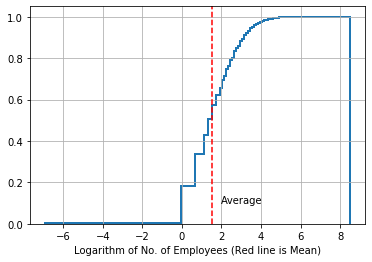

In [36]:
# Plot cdf of employee counts, with a vertical red line at the mean value. 

_ = df.NoEmp.hist(bins=150,density=True, histtype='step',cumulative=True, linewidth=2)
_ = plt.xlabel('Logarithm of No. of Employees (Red line is Mean)')
_ = plt.axvline(np.mean(df.NoEmp), color='red', linestyle='--')
_ = plt.annotate('Average', xy=(2,.1))
plt.show()

## Term ##
We can see in the histogram below that Loan terms vary greatly in the dataset, ranging from less than one year to close to 25 years (data are in months). There are also some clearly common values: 84, 240, 120, 300 and 60 months being the top-five. 

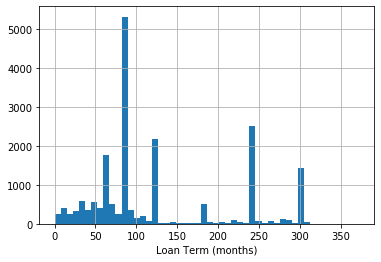

In [37]:
_ = df.Term.hist(bins=50)
_ = plt.xlabel('Loan Term (months)')
plt.show()

In [38]:
df.Term.value_counts(1)

84     0.258265
240    0.128511
120    0.104415
60     0.072132
300    0.071873
         ...   
214    0.000052
198    0.000052
253    0.000052
164    0.000052
261    0.000052
Name: Term, Length: 307, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19298 entries, 0 to 19371
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAICS               19298 non-null  int64  
 1   ApprovalFY          19298 non-null  int64  
 2   Term                19298 non-null  int64  
 3   NoEmp               19298 non-null  float64
 4   NewBiz              19298 non-null  float64
 5   CreateJob           19298 non-null  int64  
 6   RetainedJob         19298 non-null  int64  
 7   RevLineCr           19183 non-null  float64
 8   LowDoc              19242 non-null  object 
 9   DisbursementGross   19298 non-null  float64
 10  MIS_Status          19293 non-null  object 
 11  County_Name         19298 non-null  object 
 12  TotalLoansInCounty  19298 non-null  int64  
 13  PIF_RateByCounty    19298 non-null  float64
 14  MedIncome           19298 non-null  int64  
 15  Population          19298 non-null  float64
 16  PopC

## CreateJob & RetainedJob ##
At first glance, it's not clear how these columns can add significant information compared to what we already have with the NoEmp column. Still we'll take a look. 

In [40]:
# To explore the created and retained job data, we should first transform it the same way we did NoEmp"

#df.loc[df['CreateJob'] > 100, ['CreateJob']] = 100
#df.loc[df['RetainedJob'] > 100, ['RetainedJob']] = 100
df.CreateJob = np.log(df.CreateJob)
df.RetainedJob = np.log(df.RetainedJob)

C:\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


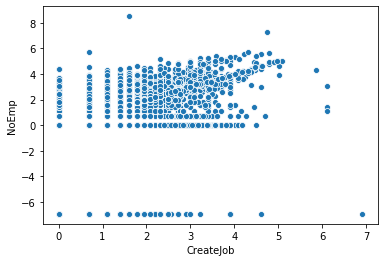

In [41]:
# We several instances of more jobs created than have been declared to exist in the NoEmp data: 

sns.scatterplot(x='CreateJob', y='NoEmp', data=df)

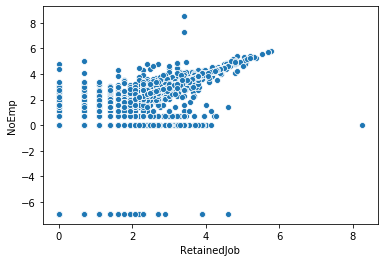

In [42]:
# Similarly, We several instances of more jobs retained than have been declared to exist in the NoEmp data:

sns.scatterplot(x='RetainedJob', y='NoEmp', data=df)

In [43]:
# We create a new column that gets the ratio of created to total jobs. 
# We add 1 to the denominator in the event that there are no employees. 

df['NewHireRatio'] = df.CreateJob / (df.NoEmp + 1)

In [44]:
# Describe tells us that over half of the businesses did not create any new jobs. 

df.NewHireRatio.describe()

count    19298.0
mean         NaN
std          NaN
min         -inf
25%         -inf
50%         -inf
75%          0.0
max          inf
Name: NewHireRatio, dtype: float64

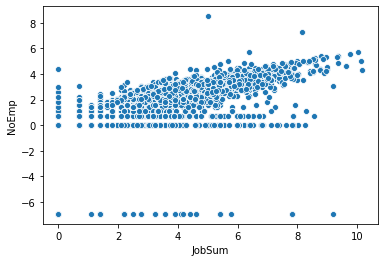

In [45]:

# We create another column called JobSum, summing the created and retained jobs, to compare to the number of total employees:

df['JobSum'] = df.CreateJob + df.RetainedJob

sns.scatterplot(x='JobSum', y='NoEmp', data=df)

In [46]:
print('Created:',np.sum(df.CreateJob),'  Retained:', np.sum(df.RetainedJob),'  Total:', np.sum(df.NoEmp))

Created: -inf   Retained: -inf   Total: 29672.07874651997


Overall, since these columns seems to add confusion and present us with more questions than answers, I don't think we have much choice but to eliminate them from the dataset:

In [47]:
# Eliminate CreateJob, RetainedJob, NewHireRatio and JobSum from dataset:

df = df.drop(columns=['CreateJob', 'RetainedJob','NewHireRatio','JobSum'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19298 entries, 0 to 19371
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAICS               19298 non-null  int64  
 1   ApprovalFY          19298 non-null  int64  
 2   Term                19298 non-null  int64  
 3   NoEmp               19298 non-null  float64
 4   NewBiz              19298 non-null  float64
 5   RevLineCr           19183 non-null  float64
 6   LowDoc              19242 non-null  object 
 7   DisbursementGross   19298 non-null  float64
 8   MIS_Status          19293 non-null  object 
 9   County_Name         19298 non-null  object 
 10  TotalLoansInCounty  19298 non-null  int64  
 11  PIF_RateByCounty    19298 non-null  float64
 12  MedIncome           19298 non-null  int64  
 13  Population          19298 non-null  float64
 14  PopChange           19298 non-null  float64
 15  LaborForceInCty     19298 non-null  int64  
 16  Empl

## NAICS Codes ##
This dataset includes NAICS (North American Industry Classification System) codes for the industries that the various businesses belong to. This might be useful information. First we'll convert the integers to useful codes. The main industrial sector is coded in the first two digits of the NAICS code. 

In [49]:
# First convert the integer values in the dataset into strings (the numbers don't have numeric meaning)

df['NAICS'] = df['NAICS'].astype(str)

In [50]:
# Create a list object that holds the first two digits of each NAICS code in the dataset.

Code = [Code[0:2] for Code in df.NAICS]
Code [0:5]

['62', '33', '62', '81', '0']

In [51]:
# Assign this list object as a new colum in the dataframe.

df['Code'] = Code

In [52]:
# A wide variety of codes are seen in the dataset. Unfortunately, about 4000 data entries are not coded (i.e., left as '0').
# Probably too much data to remove from dataset. 

df.Code.value_counts()

0     4063
44    2059
23    1999
54    1690
81    1650
72    1476
62    1020
42     863
45     830
33     708
56     589
53     382
32     356
71     301
52     276
48     268
51     238
31     212
61     123
11      72
49      51
21      50
22      11
55       7
92       4
Name: Code, dtype: int64

In [53]:
#  We'll create a new dataframe that counts loan payments by code:

Codes = pd.DataFrame(df.groupby(['Code','MIS_Status']).count()['NAICS'])
Codes = Codes.reset_index()
Codes.head()



,Code,MIS_Status,NAICS
0,0,CHGOFF,206
1,0,P I F,3857
2,11,CHGOFF,8
3,11,P I F,64
4,21,CHGOFF,7


In [54]:
# This needs to be "unmelted" (i.e., split out MIS_Status column) and then we can get the loan payment rate.

Codes = Codes.pivot(index = 'Code', columns='MIS_Status', values='NAICS')

Codes['PIF_Rate'] = Codes['P I F'] / (Codes['P I F'] + Codes['CHGOFF'])

# We can also calculate the 95% Confidence Interval for the proportion, based on sample size:

Codes['LowCI'] = Codes['PIF_Rate'] - 1.96 * np.sqrt(Codes['PIF_Rate']*(1-Codes['PIF_Rate'])/(Codes['CHGOFF']+Codes['P I F']))
Codes['UppCI'] = Codes['PIF_Rate'] + 1.96 * np.sqrt(Codes['PIF_Rate']*(1-Codes['PIF_Rate'])/(Codes['CHGOFF']+Codes['P I F']))

Codes.sort_values('PIF_Rate',ascending=False)

MIS_Status,CHGOFF,P I F,PIF_Rate,LowCI,UppCI
Code,,,,,
0,206,3857,0.949299,0.942553,0.956045
22,1,10,0.909091,0.739201,1.078981
11,8,64,0.888889,0.816296,0.961481
62,129,891,0.873529,0.853131,0.893928
21,7,43,0.860000,0.763820,0.956180
42,131,732,0.848204,0.824264,0.872144
33,112,596,0.841808,0.814927,0.868688
31,34,178,0.839623,0.790226,0.889020
32,64,292,0.820225,0.780335,0.860115


In [55]:
# Create and store a variable for the mean loan repayment rate across entire dataset (for the plot below):

meanrate = df['MIS_Status'].value_counts(1)[0]
print('Mean loan repayment rate is: ', meanrate)

Mean loan repayment rate is:  0.8254289120406365


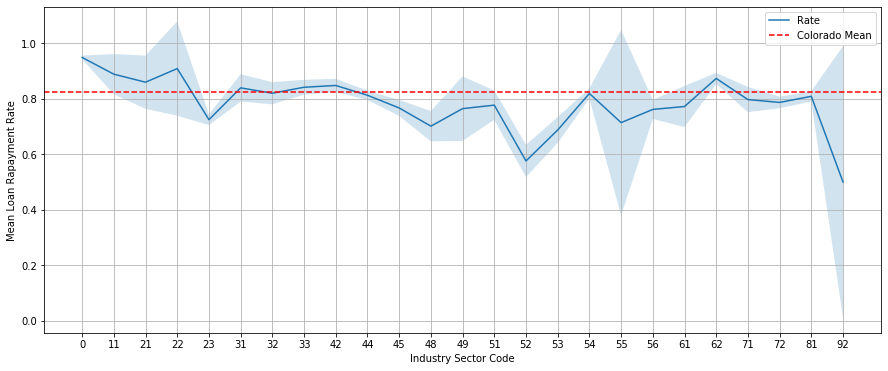

In [56]:
plt.figure(figsize=(15,6))
plt.plot(Codes.index, Codes.PIF_Rate, label='Rate')
#plt.plot(Codes.index, Codes.LowCI, color='red', ls='--', label='CI')
#plt.plot(Codes.index, Codes.UppCI, color='red', ls='--')
plt.fill_between(Codes.index, Codes.LowCI, Codes.UppCI, alpha=0.2)
plt.axhline(meanrate, color='red', linestyle = '--', label='Colorado Mean')
plt.xlabel('Industry Sector Code')
plt.ylabel('Mean Loan Rapayment Rate')
plt.legend()

plt.grid()
plt.show()

This is a pretty plot, but not as informative as it could be. For one thing, the Code numeric values don't really tell us what Industry they correspond to (at least not for me: I'm no NAICS code expert!). With this in mind, some searching on the internet located an excel file containing the primer of 2-6 digit NAICS codes. With some cleaning this file can be used to assign an actual industry to each code in the above plot. 

In [57]:
# From census.gov we can get the meanings of each of the codes:

filename = 'data\\2-6 digit_2017_Codes.xlsx'

Industry = pd.read_excel(filename,  usecols=[1,2])
Industry = Industry.dropna()
Industry.columns = ['Code', 'Industry']
Industry.head()


,Code,Industry
1,11,"Agriculture, Forestry, Fishing and Hunting"
2,111,Crop Production
3,1111,Oilseed and Grain Farming
4,11111,Soybean Farming
5,111110,Soybean Farming


In [58]:
Industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 1 to 2196
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Code      2196 non-null   object
 1   Industry  2196 non-null   object
dtypes: object(2)
memory usage: 51.5+ KB


In [59]:
# The dataset has a few non-numeric entries, due to lumping three codes for manufacturing as seen below. 

Industry[276:280]

,Code,Industry
277,238990,All Other Specialty Trade Contractors
278,31-33,Manufacturing
279,311,Food Manufacturing
280,3111,Animal Food Manufacturing


In [60]:
# Revise the bottom few rows of the dataframe to allow integer variable:

Industry.Code[278] = 31
Industry.Code[279] = 32
Industry.Code[280] = 33
Industry.Industry[279] = 'Manufacturing'
Industry.Industry[280] = 'Manufacturing'


In [61]:
# Similarly with Retail:

Industry[1089:1092]

,Code,Industry
1090,425120,Wholesale Trade Agents and Brokers
1091,44-45,Retail Trade
1092,441,Motor Vehicle and Parts Dealers


In [62]:
# Revise the bottom few rows of the dataframe to allow integer variable:

Industry.Code[1091] = 44
Industry.Code[1092] = 45
Industry.Industry[1091] = 'Retail'
Industry.Industry[1092] = 'Retail'

In [63]:
# Another for Transportation:

Industry[1251:1255]

,Code,Industry
1252,45439,Other Direct Selling Establishments
1253,454390,Other Direct Selling Establishments
1254,48-49,Transportation and Warehousing
1255,481,Air Transportation


In [64]:
# Revise the bottom few rows of the dataframe to allow integer variable:

Industry.Code[1253] = 48
Industry.Code[1254] = 49
Industry.Industry[1253] = 'Transportation'
Industry.Industry[1254] = 'Transportation'

In [65]:
# With the data thus cleaned we can make a Code feature a numeric:

Industry.Code = pd.to_numeric(Industry.Code)
Industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 1 to 2196
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Code      2196 non-null   int64 
 1   Industry  2196 non-null   object
dtypes: int64(1), object(1)
memory usage: 131.5+ KB


In [66]:
# Finalize the dataframe for merging with the dataset:

Industry = Industry[Industry['Code'] < 100].reset_index(drop=True)                 # <------Keep only the 2-digit codes
Industry['Industry'] = [Industry.split()[0] for Industry in Industry.Industry]     # <---Keep only the first word in Title
Industry['Industry'] = [Industry.split(',')[0] for Industry in Industry.Industry]  # <---Clean up the remaining commas
Industry = Industry.append({'Code':0 , 'Industry':'Unknown'}, ignore_index=True)   # <---Add the 'unknown' column!
Industry['Code'] = Industry['Code'].astype(str)                                    # <---Convert Codes to string for merging
Industry


,Code,Industry
0,11,Agriculture
1,21,Mining
2,22,Utilities
3,23,Construction
4,31,Manufacturing
5,32,Manufacturing
6,33,Manufacturing
7,42,Wholesale
8,44,Retail
9,45,Retail


In [67]:
# Write this cleaned file to the data subfolder:

Industry.to_csv('data\\NCAIS_codes.csv')

In [68]:
# We can now merge this dataframe to our dataset and drop the NAICS and Code columns;

df = pd.merge(df, Industry, how='left', on='Code')

df = df.drop(columns = ['NAICS', 'Code'])

df.head().T

,0,1,2,3,4
ApprovalFY,2006,1997,1997,2005,1997
Term,264,60,120,35,60
NoEmp,2.19722,0.693147,1.38629,1.09861,0.693147
NewBiz,0,0,0,0,0
RevLineCr,0,0,0,0,0
LowDoc,0,1,0,0,1
DisbursementGross,1.5242e+06,90000,59000,50000,21200
MIS_Status,P I F,P I F,P I F,CHGOFF,P I F
County_Name,Mesa,Mesa,Mesa,Mesa,Mesa
TotalLoansInCounty,445,445,445,445,445


In [69]:
# Now let's repeat the above comparison of loan repayment rates with labeled industries;

Codes = pd.DataFrame(df.groupby(['Industry','MIS_Status']).count()['Term'])
Codes = Codes.reset_index()

# This needs to be "unmelted" (i.e., split out MIS_Status column) and then we can get the loan payment rate.

Codes = Codes.pivot(index = 'Industry', columns='MIS_Status', values='Term')

Codes['PIF_Rate'] = Codes['P I F'] / (Codes['P I F'] + Codes['CHGOFF'])

# We can also calculate the 95% Confidence Interval for the proportion, based on sample size:

Codes['LowCI'] = Codes['PIF_Rate'] - 1.96 * np.sqrt(Codes['PIF_Rate']*(1-Codes['PIF_Rate'])/(Codes['CHGOFF']+Codes['P I F']))
Codes['UppCI'] = Codes['PIF_Rate'] + 1.96 * np.sqrt(Codes['PIF_Rate']*(1-Codes['PIF_Rate'])/(Codes['CHGOFF']+Codes['P I F']))

Codes.sort_values('PIF_Rate',ascending=False)

MIS_Status,CHGOFF,P I F,PIF_Rate,LowCI,UppCI
Industry,,,,,
Unknown,206,3857,0.949299,0.942553,0.956045
Utilities,1,10,0.909091,0.739201,1.078981
Agriculture,8,64,0.888889,0.816296,0.961481
Health,129,891,0.873529,0.853131,0.893928
Mining,7,43,0.860000,0.763820,0.956180
Wholesale,131,732,0.848204,0.824264,0.872144
Manufacturing,210,1066,0.835423,0.815078,0.855769
Professional,305,1384,0.819420,0.801074,0.837765
Other,315,1335,0.809091,0.790127,0.828055


Finally, the plot below. Not only do the categorical names make the data more meaningful, a few of the industry sectors has multiple codes, so the figure becomes less complex as well. Overall, we see that sectors like Transportation, Finance, Education, Construction and Real Estate tend to underperform.

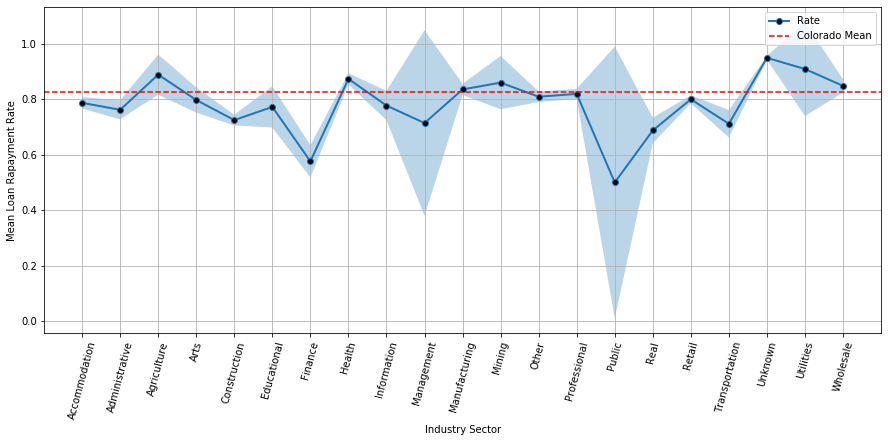

In [70]:
plt.figure(figsize=(15,6))
plt.plot(Codes.index, Codes.PIF_Rate, label='Rate', marker='o', markerfacecolor='black', linewidth = 2)
plt.fill_between(Codes.index, Codes.LowCI, Codes.UppCI, alpha = 0.3)
plt.axhline(meanrate, color='red', linestyle='--', label='Colorado Mean')
plt.xlabel('Industry Sector')
plt.xticks(rotation=75)
plt.ylabel('Mean Loan Rapayment Rate')
plt.legend()

plt.grid()
plt.show()

## EDA Exploration of continuous distributions & Correlation ###

in this section, we will explore the distributions of a number of continuous dsitribution features in the dataset, grouped by Loan REyamnet status (i.e., MIS_Status). We will use violin plot, slightly more sophisticated and informative than boxplots, to get a hint not only at the dsitribution of each feature but if there are significant differences based on loan repayment. 

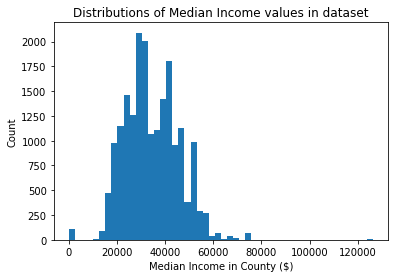

In [71]:
plt.hist(df.MedIncome, bins=50)
plt.title('Distributions of Median Income values in dataset')
plt.ylabel('Count')
plt.xlabel('Median Income in County ($)')
plt.show()

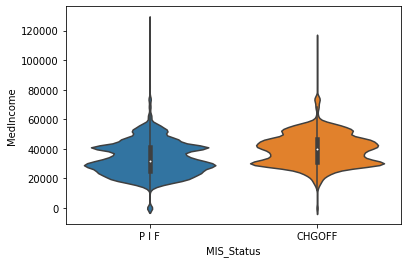

In [72]:
# Explore data with a series of violin plots:

# Loan default distribution seems to have slightly higher median income.

sns.violinplot(x='MIS_Status', y='MedIncome', data=df)

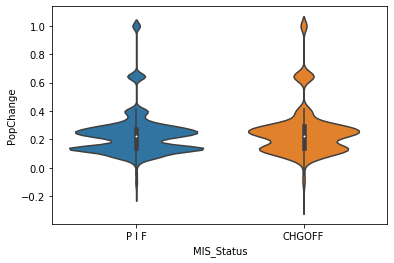

In [73]:
# Loan default distribution seems to have no obvious difference in Population Change.  .

sns.violinplot(x='MIS_Status', y='PopChange', data=df)

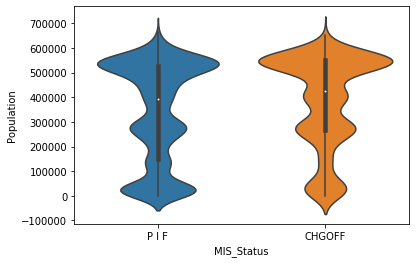

In [74]:
# Loan default distribution seems to have slightly higher population.

sns.violinplot(x='MIS_Status', y='Population', data=df)

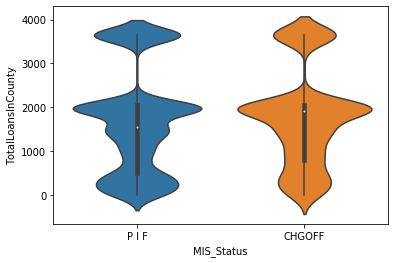

In [75]:
# Loan default distribution seems to have slightly higher number of loans in county.

sns.violinplot(x='MIS_Status', y='TotalLoansInCounty', data=df)

(-100000, 1000000)

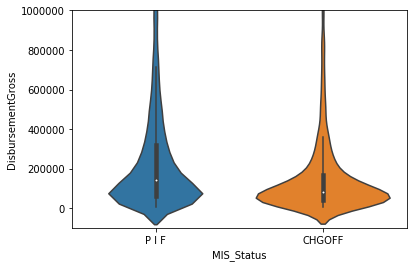

In [76]:
# Loan default distribution seems to have lower gross disbursement.

sns.violinplot(x='MIS_Status', y='DisbursementGross', data=df)
plt.ylim(-100000,1000000)

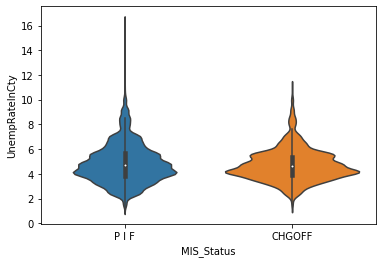

In [77]:
# Loan default distribution seems to have no discernable difference in county-wide unemployment rate.

sns.violinplot(x='MIS_Status', y='UnempRateInCty', data=df)

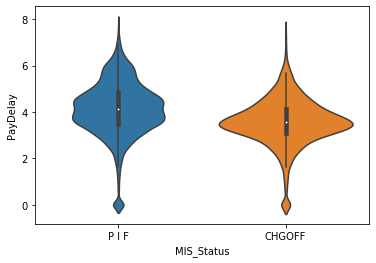

In [96]:
# Loan default distribution seems to have slightly lower pay delay.

sns.violinplot(x='MIS_Status', y='PayDelay', data=df)
#plt.ylim(-50,500)

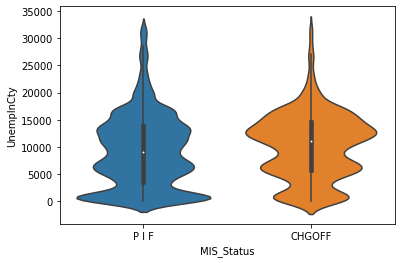

In [79]:
# Loan default distribution seems to have slightly higher number of unemployed in county.

sns.violinplot(x='MIS_Status', y='UnempInCty', data=df)

## Correlation between features##
The next step is to explore the pearson's correlation between all continuous variables in the dataset, to see if any redundancies exist:

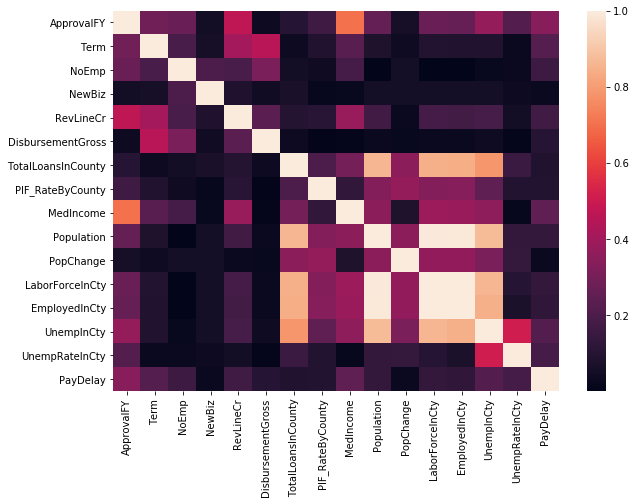

In [80]:
# Explore if any of the variables in dataset are too well correlated to any other variables:

corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(abs(corr), )


It appears that Population, LaborForceInCty ad EmployedInCty are extremely highly correlated to one another - perhaps not surprisingly. Pearson's correlatio coefficients are greater than 0.99!  
Scatter plots show nearly linear behavior, as shown below. It would therefore make sense to keep only one of these three variables. The question is, which one?

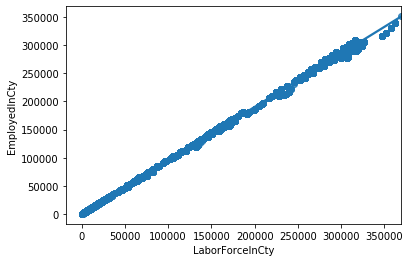

In [81]:
# Seaborn regression plots:

sns.regplot(x='LaborForceInCty',y='EmployedInCty', data=df)

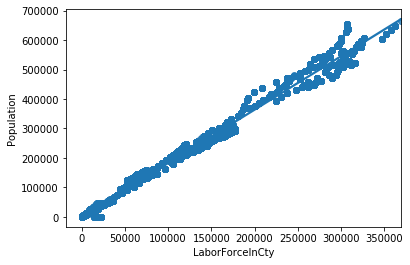

In [82]:
sns.regplot(x='LaborForceInCty',y='Population', data=df)

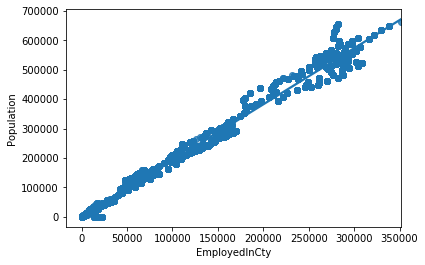

In [83]:
sns.regplot(x='EmployedInCty',y='Population', data=df)

In [84]:
df.groupby(['MIS_Status'])['Population'].describe()

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
CHGOFF,3368.0,384978.749109,187438.520744,0.0,267177.0,424913.0,550756.0,655150.0
P I F,15925.0,341460.597677,204280.398957,0.0,148654.0,395146.0,527643.0,663963.0


In [85]:
Pop_PIF = df[df['MIS_Status'] == 'P I F'] ['Population']
Pop_DEF = df[df['MIS_Status'] == 'CHGOFF'] ['Population']

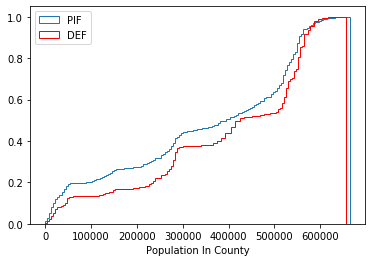

In [86]:
_ = plt.hist(Pop_PIF, bins=150,density=True, histtype='step',cumulative=True, label='PIF')
_ = plt.hist(Pop_DEF, bins=150,density=True, histtype='step',cumulative=True, color='red', label="DEF")
_ = plt.xlabel('Population In County')
_ = plt.legend(loc='upper left')
#_ = plt.axvline(np.mean(df.NoEmp), color='red')
plt.show()

In [87]:
# We will use the Kolmogorov-Smirnov 2-sample test to explore the difference between distributions:

from scipy.stats import ks_2samp

ks_2samp(Pop_PIF, Pop_DEF)

Ks_2sampResult(statistic=0.12905996785704965, pvalue=1.2032945633414641e-40)

In [88]:
# For Employed In County

Emp_PIF = df[df['MIS_Status'] == 'P I F'] ['EmployedInCty']
Emp_DEF = df[df['MIS_Status'] == 'CHGOFF'] ['EmployedInCty']

In [89]:
ks_2samp(Emp_PIF, Emp_DEF)

Ks_2sampResult(statistic=0.1333528229490225, pvalue=2.2918919152836292e-43)

In [90]:
# For Labor Force In County:

Lab_PIF = df[df['MIS_Status'] == 'P I F'] ['LaborForceInCty']
Lab_DEF = df[df['MIS_Status'] == 'CHGOFF'] ['LaborForceInCty']

In [91]:
ks_2samp(Lab_PIF, Lab_DEF)

Ks_2sampResult(statistic=0.1319081986896713, pvalue=1.929831414147716e-42)

Based on above analysis, we (rather arbitrarily) conclude to eliminate the labor force and population
columns from dataset. We retain EmployedInCty as it performed "best" in 2-sample test, so in theory
it will have the greatest model impact.

In [92]:
df = df.drop(columns=['Population', 'LaborForceInCty'])

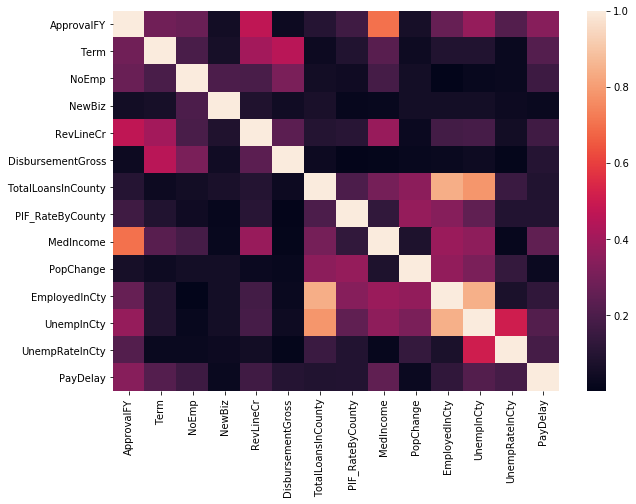

In [93]:
# Repeat correlation exercise to confirm no highly correlated pairs of variables:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.light_palette("green")
sns.heatmap(abs(corr))

In [94]:
# Looks good! 

In [95]:
# Write the resulting DataFrame to csv for storage for later use. 

file_name = 'data\\LIC_Model_Input.csv'
df.to_csv(file_name, encoding='utf-8', index=False)